In [41]:
# math 
import numpy as np

# random
from numpy.random import rand, randn, choice
np.random.seed(6)

# dataframes
import pandas as pd

# plotting
import matplotlib.pyplot as plt

# Problem setup

In [4]:
# plot line y = w*x+b
def plotline(w,b, xmin=-100,xmax=100,nsamples=100,label=''):
    x = np.linspace(xmin, xmax, nsamples)
    y = w * x + b
    plt.plot(x, y, color='k', label=label)
    plt.legend(loc="upper left")
    plt.grid()

In [5]:
# plot function y = f(x)
def plotfunc(f, xmin=-100,xmax=100,nsamples=100,label=""):
    x = np.linspace(xmin, xmax, nsamples)
    y = f(x)
    plt.plot(x, y, color='k', label=label)
    plt.legend(loc="upper left")
    plt.grid()

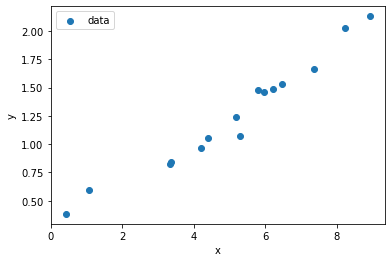

In [6]:
# Generate and plot data
n = 15
def sample_data(num_points):
    x = rand(num_points)*10
    y = .2 + .2*x + .1*np.sin(x) + .1*randn(num_points) - .01*((x-5)/6)**4
    return x,y

x,y = sample_data(n)


def plotdata(x=x,y=y, margin=.05):
    plt.scatter(x,y, label="data")
    plt.legend(loc="upper left")
    plt.xlabel("x") 
    plt.ylabel("y")     
    range_y = np.max(y) - np.min(y)
    range_x = np.max(x) - np.min(x)
    plt.ylim([np.min(y)-margin*range_y,np.max(y)+margin*range_y])
    plt.xlim([np.min(x)-margin*range_x,np.max(x)+margin*range_x])
    
plotdata()
plt.show()

# Bootstrap estimators

In [74]:
# sample K data sets of n samples each and compute a model on each
# see how the models vary
n = 50
K = 500

models = np.zeros((K,2))
for k in range(K):
    xk,yk = sample_data(n) # this experiment samples from the true data distribution many many times (not realistic)
    Xk = np.column_stack([xk, np.ones(xk.shape)])
    wk = np.linalg.lstsq(Xk, yk, rcond=None)[0]
    models[k,:] = wk

(array([ 1.,  0.,  3.,  6.,  8., 16., 17., 36., 42., 57., 59., 76., 50.,
        48., 34., 19., 15.,  8.,  2.,  3.]),
 array([0.10910467, 0.11973151, 0.13035835, 0.14098519, 0.15161203,
        0.16223887, 0.17286572, 0.18349256, 0.1941194 , 0.20474624,
        0.21537308, 0.22599992, 0.23662676, 0.2472536 , 0.25788045,
        0.26850729, 0.27913413, 0.28976097, 0.30038781, 0.31101465,
        0.32164149]),
 <a list of 20 Patch objects>)

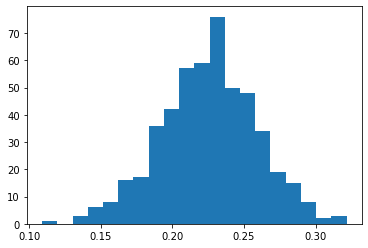

In [75]:
# histogram of the distribution of the first coefficient
# could use to compute, eg, confidence intervals

plt.hist(models[:,1], bins=20)

In [80]:
np.mean(models, axis=0)

array([0.19856428, 0.22516691])

In [81]:
np.var(models,axis=0)

array([3.25770304e-05, 1.13203494e-03])

In [84]:
# can sample with replacement using choice
choice(range(20), 5)

array([10, 17, 19, 17,  2])

In [91]:
# eg,
a = np.sort(rand(20))
s = choice(range(20), 5)
np.column_stack([s, a[s]])

array([[11.        ,  0.37412396],
       [14.        ,  0.59559251],
       [18.        ,  0.80537399],
       [ 7.        ,  0.29205553],
       [13.        ,  0.47390698]])

In [95]:
# resample K bootstrap data sets of n samples each and compute a model on each
# see how the models vary
# how does result depend on number of datapoints n? number of resamples K?
n = 50
K = 1000

x,y = sample_data(n) # this is the only data we've got!

models = np.zeros((K,2))
for k in range(K):
    mysample = choice(range(n),n)
    xk,yk = x[mysample], y[mysample]
    Xk = np.column_stack([xk, np.ones(n)])
    wk = np.linalg.lstsq(Xk, yk, rcond=None)[0]
    models[k,:] = wk

(array([  1.,   3.,   2.,   6.,  11.,  21.,  36.,  64.,  88., 124., 129.,
        150., 150.,  92.,  64.,  36.,  17.,   4.,   0.,   2.]),
 array([0.13642948, 0.14843627, 0.16044306, 0.17244985, 0.18445664,
        0.19646343, 0.20847022, 0.22047702, 0.23248381, 0.2444906 ,
        0.25649739, 0.26850418, 0.28051097, 0.29251776, 0.30452455,
        0.31653134, 0.32853813, 0.34054492, 0.35255171, 0.36455851,
        0.3765653 ]),
 <a list of 20 Patch objects>)

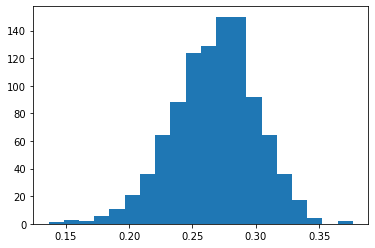

In [97]:
plt.hist(models[:,1], bins=20)

In [98]:
np.mean(models,axis=0)

array([0.1919301, 0.2674654])

In [100]:
# as K increases, mean of the bootstrap models should converge to 
# the model fit on the original data set
X = np.column_stack([x, np.ones(n)])
w = np.linalg.lstsq(X,y,rcond=None)[0]
w

array([0.19162518, 0.26990773])

In [101]:
np.var(models,axis=0)

array([3.05079260e-05, 1.09505492e-03])

# Bootstrap to compute variance of prediction

In [38]:
# sample data
x,y = sample_data(n)

# compute feature transformation
def phi(x): return np.ones((len(x),1))   # mean
def phi(x): return np.reshape(x, (len(x),1)) # linear model without offset
# def phi(x): return np.column_stack([x, np.ones(x.shape)]) # linear model with offset
# def phi(x): return np.column_stack([np.power(x,k) for k in range(5)]) # 4th order polynomial model
X = phi(x)
X.shape

(15, 1)

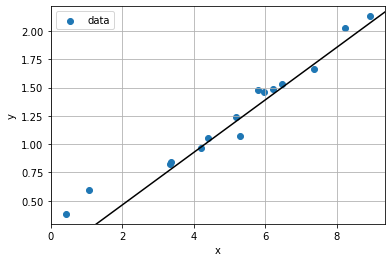

In [39]:
# fit model
w = np.linalg.lstsq(X, y, rcond=None)[0]
def g(x): return phi(x).dot(w)

# plot
plotdata()
plotfunc(g, xmin=0, xmax=10)

(array([ 4.,  9., 14., 19., 17., 17., 13.,  3.,  2.,  2.]),
 array([0.87369826, 0.95217923, 1.0306602 , 1.10914116, 1.18762213,
        1.2661031 , 1.34458407, 1.42306504, 1.501546  , 1.58002697,
        1.65850794]),
 <a list of 10 Patch objects>)

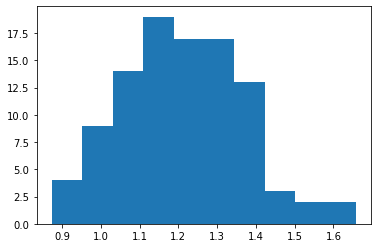

In [63]:
x0,y0 = sample_data(n) # sample data
stats = []
for k in range(100):
    # sample new data
    x,y = sample_data(n)
    # resample data (bootstrap)
#     samples = choice(range(n),n)
#     x,y = x0[samples], y0[samples] 

    # compute feature transformation
    def phi(x): return np.ones((len(x),1))   # mean
    # def phi(x): return np.reshape(x, (len(x),1)) # linear model without offset
    # def phi(x): return np.column_stack([x, np.ones(x.shape)]) # linear model with offset
    # def phi(x): return np.column_stack([np.power(x,k) for k in range(5)]) # 4th order polynomial model
    X = phi(x)

    # fit model
    w = np.linalg.lstsq(X, y, rcond=None)[0]
    def g(x): return phi(x).dot(w)
    
    stats.append(g([3]))
    
stats=np.concatenate(stats)
plt.hist(stats,bins=10)    